Projeto de Eletromagnetismo e Ondulatoria

Membros:

- [André Frugis](https://github.com/andrefrugis): andref9@al.insper.edu.br
- [Felipe Frug Mauro](https://github.com/FelipeFrug): felipefm5@al.insper.edu.br
- [Joao Otavio Palma](https://github.com/joaoopalma): joaoogp@al.insper.edu.br
- [Lucas Hix](https://github.com/Peng1104): lucash@al.insper.edu.br

O objetivo deste projeto é recarregar uma bateria de um marca passo sem a necessidade de fisicamente ter acesso a bateria. Para isso será ultilizado um carregamento indutivo.

In [447]:
# Bibliotecas python ultilizadas no Projeto

from math import *
from cmath import *

import numpy as np
import matplotlib.pyplot as plt

Valores de referência do marca passo:

Valores para o carregamento do Marcapasso:</p>
300mA</p>
4.1V</p>

In [448]:
# Transformador

# Bobina primária
resistenciaBobinaPrimaria = 0.34 # Ohms

# Bobina secundária
resistenciaBobinaSecundaria = 0.34 # Ohms

# Fonte
fonte = 5 # Volts

# Ajuste da fonte (parte 6)
fonte = (2/pi) * fonte

# Marcapasso
carga = 4.1/300e-3 # Volts por Ampere = Ohms

print(f"Resistência equivalente do Marcapasso: {carga:.2f}Ω")

fatorDeAcoplamento = 0.2

Resistência equivalente do Marcapasso: 13.67Ω


Equações do Transformador:

Primário:

$$ (X_{L_1} + R_1 + X_{C_1}) \cdot I_1 + X_M = TensãoFonte $$

Secundário:

$$ (X_{L_2} + R_2 + \frac{1}{\frac{1}{R_c}+\frac{1}{X_{C_2}}}) \cdot I_2 - X_M = 0 $$

Forma matricial:

$$ \begin{bmatrix} R_1 + X_{L_1} + X_{C_1} & -X_M \\ -X_M & X_{L_2} + R_2 + \frac{1}{\frac{1}{R_c}+\frac{1}{X_{C_2}}} \end{bmatrix} \cdot \begin{bmatrix} I_1 \\ I_2 \end{bmatrix} = \begin{bmatrix} TensãoFonte \\ 0 \end{bmatrix} $$

Forma matricial para resolver para as correntes:

$$ \begin{bmatrix} R_1 + X_{L_1} + X_{C_1} & -X_M \\ -X_M & X_{L_2} + R_2 + \frac{R_c \cdot X_{C_2}}{R_c + X_{C_2}} \end{bmatrix}^{-1} \cdot \begin{bmatrix} TensãoFonte \\ 0 \end{bmatrix} = \begin{bmatrix} I_1 \\ I_2 \end{bmatrix} $$

In [449]:
def CalcularCorrentesNoTransformador(Uf : float, Rc : float, R1 : float, R2 : float, C1 : float, C2 : float, L1 : float, L2 : float, w : float, k: float) -> tuple[complex, complex]:
    XL1 = 1j*w*L1
    XL2 = 1j*w*L2
    XC1 = 1/(1j*w*C1)
    XC2 = 1/(1j*w*C2)
    XM = 1j*w*(k*sqrt(L1*L2))

    Z = np.array([[R1+XL1+XC1, -XM], [-XM, XL2+R2+(Rc*XC2/(Rc+XC2))]])
    V = np.array([Uf, 0])

    I = np.dot(np.linalg.inv(Z), V)

    return I[0], I[1]

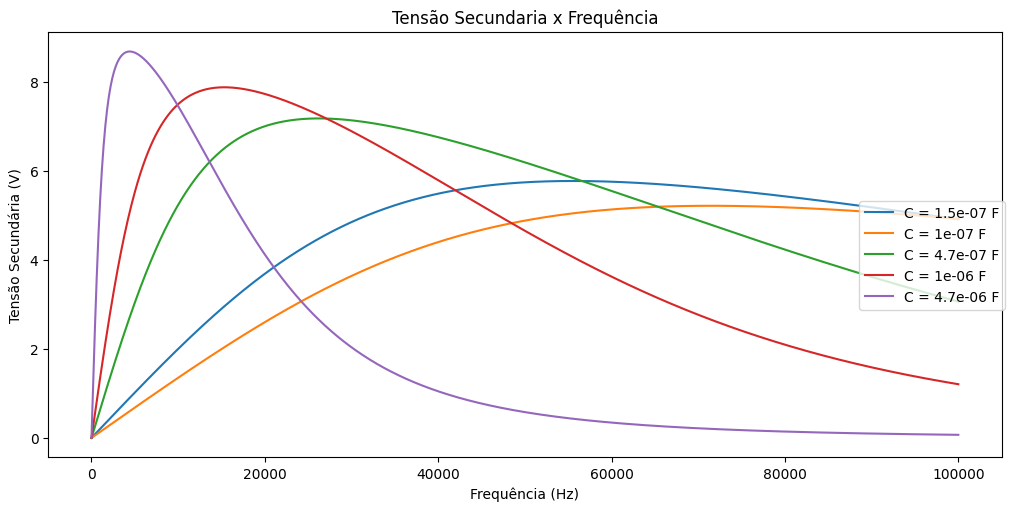

In [450]:
# Lista de capacitores disponíveis
Capacitores = [150e-9, 0.1e-6, 0.47e-6, 1e-6, 4.7e-6]

# Lista de frequências para análise
Frequencias = np.linspace(1, 100e3, 1000, endpoint=True)

vMarcaPasso = []
SFonte = []
SMarcaPasso = []
FatorDeEficiencia = []
frequenciaDeRessonancia = {}

fig, ax = plt.subplots(layout='constrained',figsize=(10,5))

for c in Capacitores:
	vMarcaPasso.append([])
	SFonte.append([])
	SMarcaPasso.append([])
	FatorDeEficiencia.append([])

	for f in Frequencias:
		w = 2*pi*f
		L = 1/(w*w*c)
		
		rdc = resistenciaBobinaPrimaria + ((2 * resistenciaBobinaPrimaria) / (100 * 10**3) ) * f
		
		i1,i2 = CalcularCorrentesNoTransformador(fonte, carga, rdc, rdc, c, c, L, L, w, fatorDeAcoplamento)
		
		XC2 = 1/(1j*w*c)

		r = (carga*XC2)/(carga+XC2)
		
		# Tensão no marcapasso
		vMarcaPasso[-1].append(abs(i2*r))

		# Potencias do circuito
		SFonte[-1].append((fonte*i1.conjugate()/2).real)
		SMarcaPasso[-1].append(((vMarcaPasso[-1][-1]**2/carga)/2).real)
		FatorDeEficiencia[-1].append((SMarcaPasso[-1][-1]/SFonte[-1][-1]))
	
	frequenciaDeRessonancia[c] = Frequencias[vMarcaPasso[-1].index(max(vMarcaPasso[-1]))]

	ax.plot(Frequencias, vMarcaPasso[-1], label=f"C = {c} F")

fig.legend(loc='center right')

plt.title("Tensão Secundaria x Frequência")
plt.xlabel("Frequência (Hz)")
plt.ylabel("Tensão Secundária (V)")
plt.show()

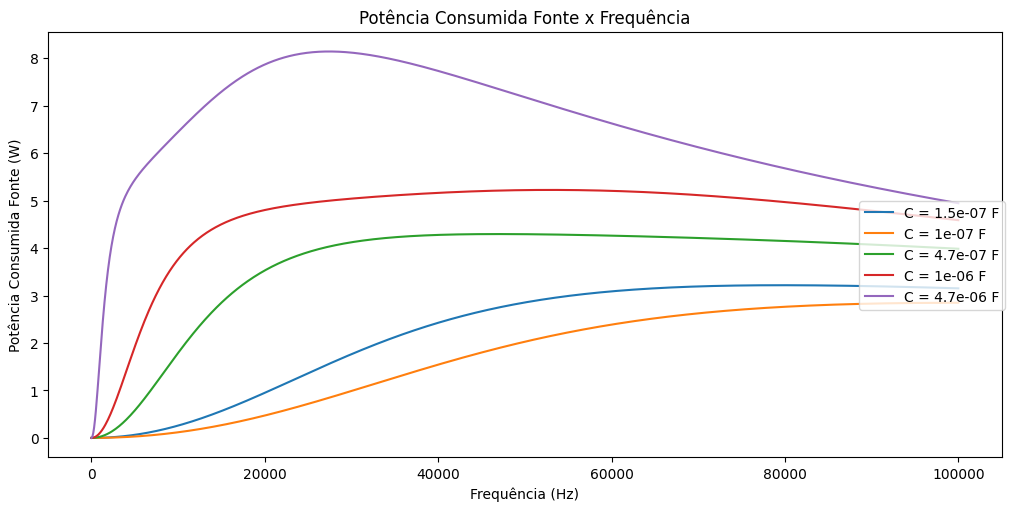

In [451]:
fig, ax = plt.subplots(layout='constrained',figsize=(10,5))

for i in range(len(Capacitores)):
	ax.plot(Frequencias, SFonte[i], label=f"C = {Capacitores[i]} F")

fig.legend(loc='center right')
plt.title("Potência Consumida Fonte x Frequência")
plt.xlabel("Frequência (Hz)")
plt.ylabel("Potência Consumida Fonte (W)")
plt.show()

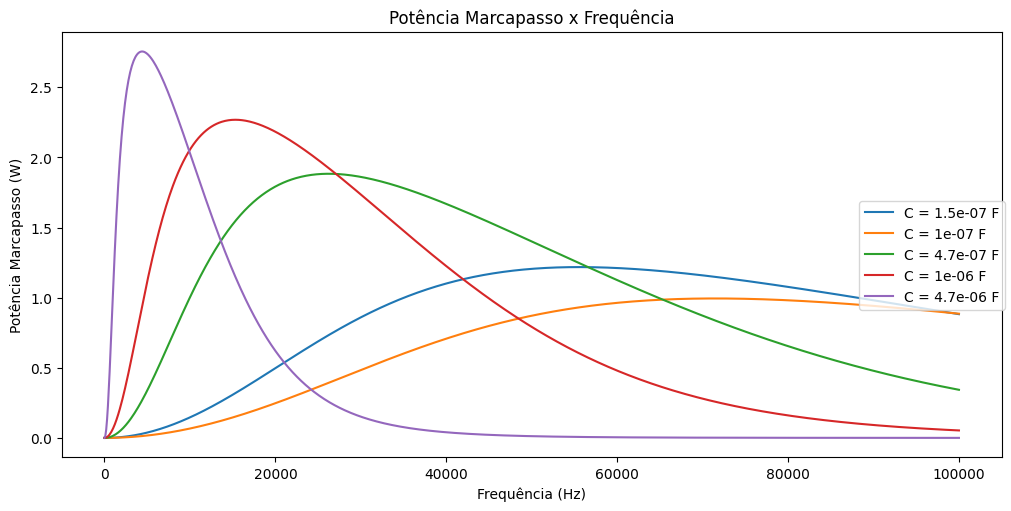

In [452]:
fig, ax = plt.subplots(layout='constrained',figsize=(10,5))

for i in range(len(Capacitores)):
	ax.plot(Frequencias, SMarcaPasso[i],label=f"C = {Capacitores[i]} F")

fig.legend(loc='center right')
plt.title("Potência Marcapasso x Frequência")
plt.xlabel("Frequência (Hz)")
plt.ylabel("Potência Marcapasso (W)")
plt.show()

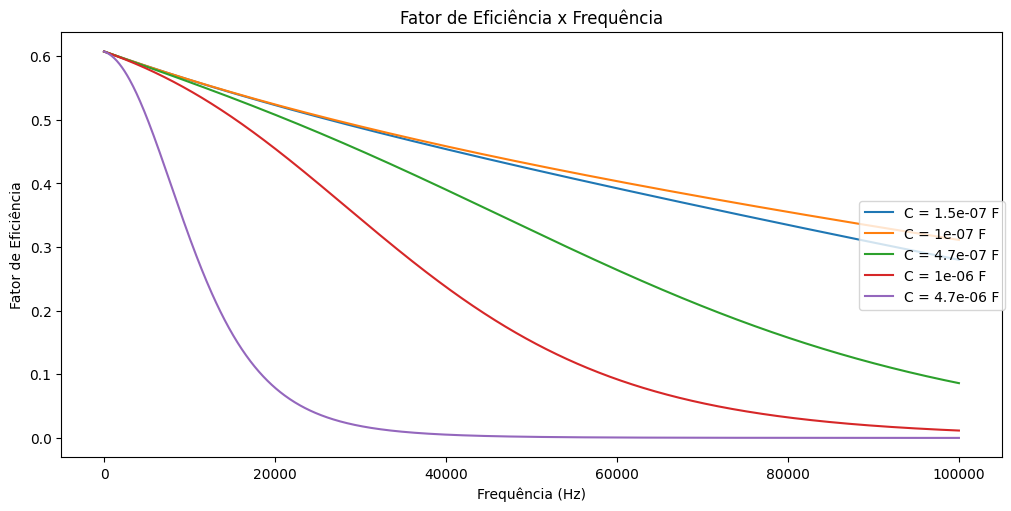

In [453]:
fig, ax = plt.subplots(layout='constrained',figsize=(10,5))

for i in range(len(Capacitores)):
	ax.plot(Frequencias, FatorDeEficiencia[i],label=f"C = {Capacitores[i]} F")

fig.legend(loc='center right')

plt.title("Fator de Eficiência x Frequência")
plt.xlabel("Frequência (Hz)")
plt.ylabel("Fator de Eficiência")
plt.show()

Explicar razão para escolha do capacitor 1e-6 ...

In [454]:
# Valores para o capacitor de 1uF
c = 1e-6
F = frequenciaDeRessonancia[c]
w = 2*pi*F
L = 1/(w*w*c)

# Indice do capacitor escolhido
idx = Capacitores.index(c)

# Reatribuição dos valores, para o capacitor escolhido
vMarcaPasso = vMarcaPasso[idx]
SFonte = SFonte[idx]
SMarcaPasso = SMarcaPasso[idx]
FatorDeEficiencia = FatorDeEficiencia[idx]

# Indice da frequência de ressonância
idx = list(Frequencias).index(F)

print(f"A frequência de ressonância para o capacitor de 1uF é {F:.4f} Hz")

A frequência de ressonância para o capacitor de 1uF é 15316.1622 Hz


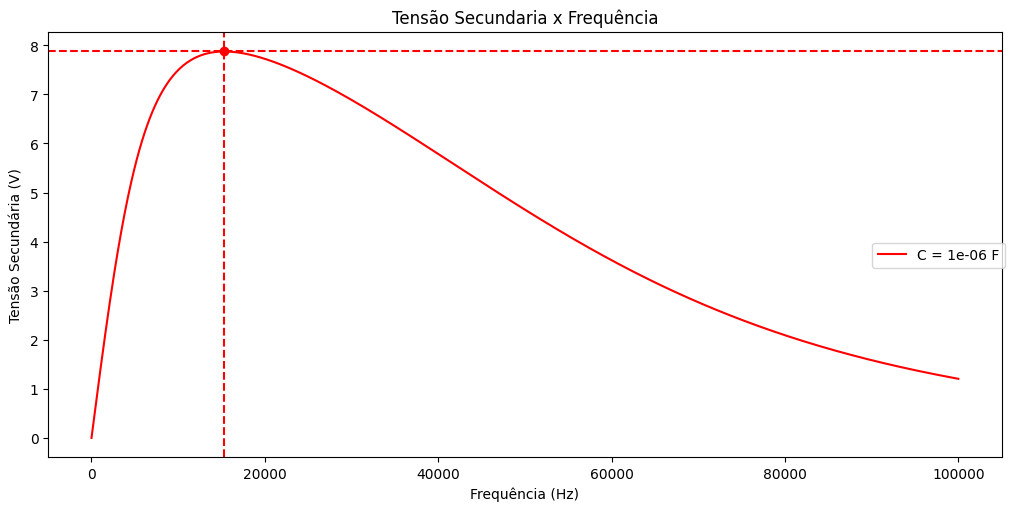

A indutância para a frequência de ressonância é 0.108 mH


In [455]:
fig, ax = plt.subplots(layout='constrained',figsize=(10,5))

ax.plot(Frequencias, vMarcaPasso, label=f"C = {c} F", color='red')
ax.plot(F, vMarcaPasso[idx], 'ro')

plt.axvline(x=F, color='r', linestyle='--')
plt.axhline(y=vMarcaPasso[idx], color='r', linestyle='--')

fig.legend(loc='center right')

plt.title("Tensão Secundaria x Frequência")
plt.xlabel("Frequência (Hz)")
plt.ylabel("Tensão Secundária (V)")
plt.show()

print(f"A indutância para a frequência de ressonância é {L*1000:.3f} mH")

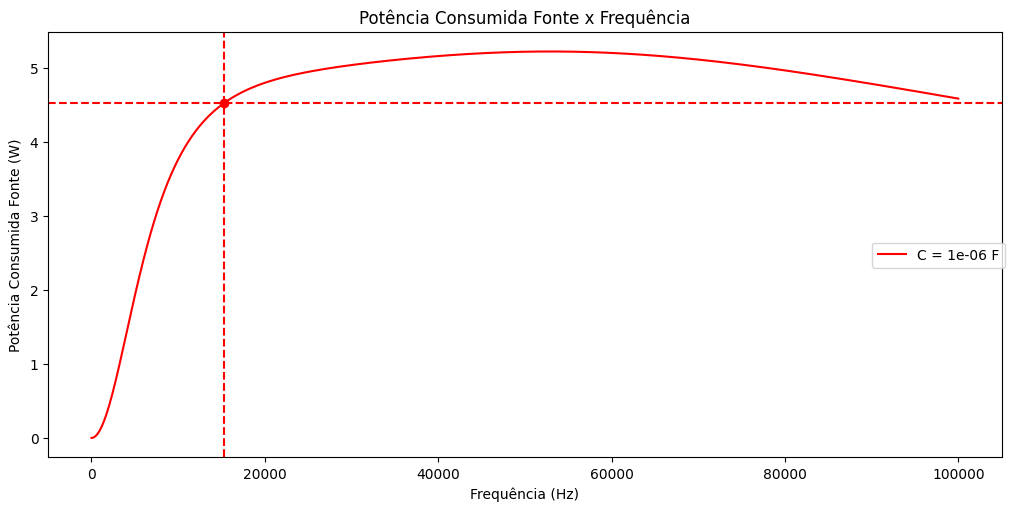

A potência consumida pela fonte na frequência de ressonância é 4.5296 W


In [456]:
fig, ax = plt.subplots(layout='constrained',figsize=(10,5))

ax.plot(Frequencias, SFonte, label=f"C = {c} F", color='red')
ax.plot(F, SFonte[idx], 'ro')

plt.axvline(x=F, color='r', linestyle='--')
plt.axhline(y=SFonte[idx], color='r', linestyle='--')

fig.legend(loc='center right')

plt.title("Potência Consumida Fonte x Frequência")
plt.xlabel("Frequência (Hz)")
plt.ylabel("Potência Consumida Fonte (W)")
plt.show()

print(f"A potência consumida pela fonte na frequência de ressonância é {SFonte[idx]:.4f} W")

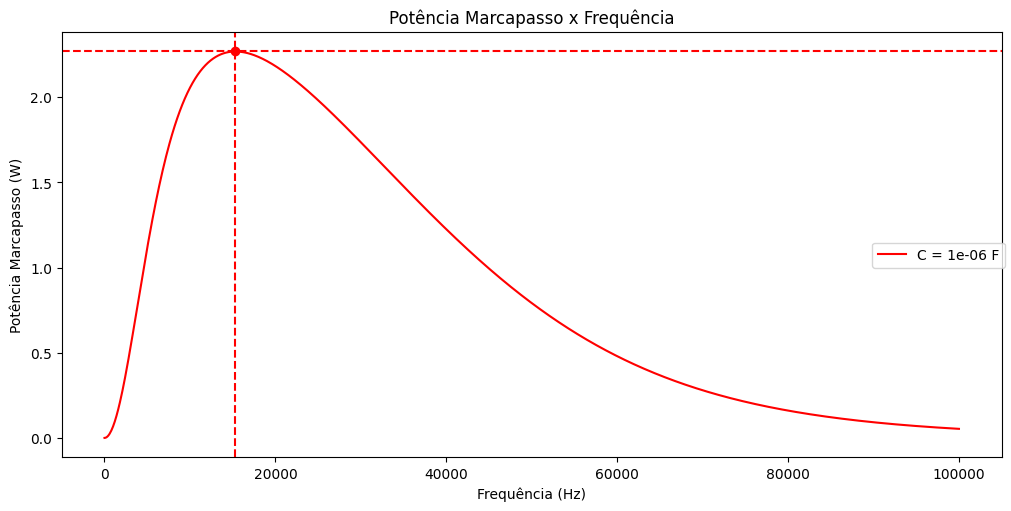

A potência no marcapasso na frequência de ressonância é 2.2687 W


In [457]:
fig, ax = plt.subplots(layout='constrained',figsize=(10,5))

ax.plot(Frequencias, SMarcaPasso, label=f"C = {c} F", color='red')
ax.plot(F, SMarcaPasso[idx], 'ro')

plt.axvline(x=F, color='r', linestyle='--')
plt.axhline(y=SMarcaPasso[idx], color='r', linestyle='--')

fig.legend(loc='center right')

plt.title("Potência Marcapasso x Frequência")
plt.xlabel("Frequência (Hz)")
plt.ylabel("Potência Marcapasso (W)")
plt.show()

print(f"A potência no marcapasso na frequência de ressonância é {SMarcaPasso[idx]:.4f} W")

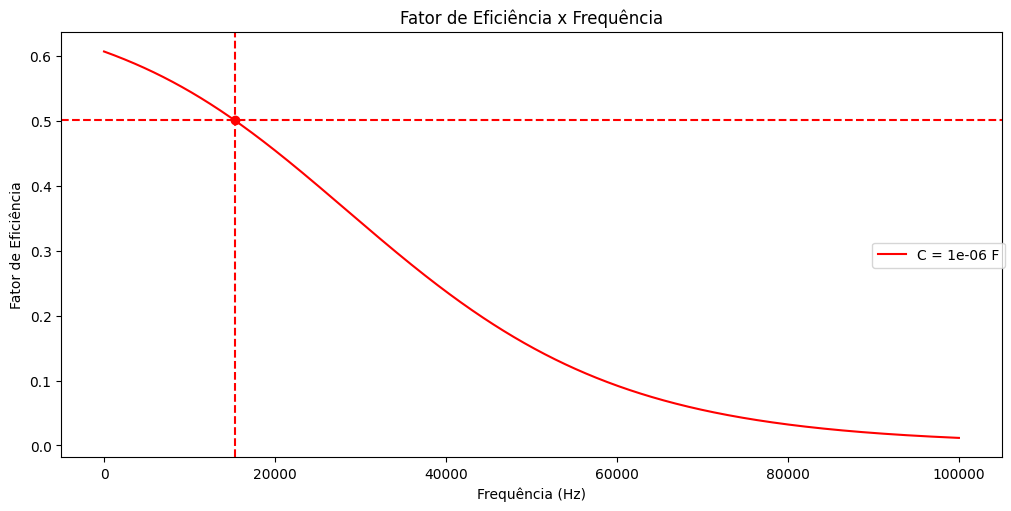

O fator de eficiência na frequência de ressonância é 50.09%


In [458]:
fig, ax = plt.subplots(layout='constrained',figsize=(10,5))

ax.plot(Frequencias, FatorDeEficiencia, label=f"C = {c} F", color='red')
ax.plot(F, FatorDeEficiencia[idx], 'ro')

plt.axvline(x=F, color='r', linestyle='--')
plt.axhline(y=FatorDeEficiencia[idx], color='r', linestyle='--')

fig.legend(loc='center right')

plt.title("Fator de Eficiência x Frequência")
plt.xlabel("Frequência (Hz)")
plt.ylabel("Fator de Eficiência")
plt.show()

print(f"O fator de eficiência na frequência de ressonância é {FatorDeEficiencia[idx]*100:.2f}%")

<center><img src="physika.png"></center>

In [459]:
# Valores medidos após a construção das bobinas (15316 Hz)

# Bobina primária (perna curta)
#resistenciaBobinaPrimaria = 651.0e-3   # Ohms
#indutanciaBobinaPrimaria = 157.9e-6    # H
resistenciaBobinaPrimaria = 1.099       # Ohms
indutanciaBobinaPrimaria = 158.9e-6     # H

# Bobina secundária (perna longa)
#resistenciaBobinaSecundaria = 678.5e-3 # Ohms
#indutanciaBobinaSecundaria = 159.2e-6  # H
resistenciaBobinaSecundaria = 761.3e-3  # Ohms
indutanciaBobinaSecundaria = 159.5e-6   # H

F = 1/(2*pi*sqrt(indutanciaBobinaSecundaria*c))
w = 2*pi*F

print(f"Freqência de ressonância para as medições: {F.real:.4f} Hz")

Freqência de ressonância para as medições: 12602.0091 Hz


Tensão da Fonte: 3.18V
O valor de pico para a carga 6Ω é 2.4470V com k = 0.3203
O valor de pico para a carga 7Ω é 2.7547V com k = 0.3163
O valor de pico para a carga 8Ω é 3.0406V com k = 0.3118
O valor de pico para a carga 9Ω é 3.3071V com k = 0.3068
O valor de pico para a carga 10Ω é 3.5562V com k = 0.3018
O valor de pico para a carga 11Ω é 3.7898V com k = 0.2968
O valor de pico para a carga 12Ω é 4.0096V com k = 0.2918
O valor de pico para a carga 13Ω é 4.2169V com k = 0.2868
O valor de pico para a carga 14Ω é 4.4130V com k = 0.2823
O valor de pico para a carga 15Ω é 4.5991V com k = 0.2773
O valor de pico para a carga 16Ω é 4.7761V com k = 0.2728
O valor de pico para a carga 17Ω é 4.9449V com k = 0.2683
O valor de pico para a carga 18Ω é 5.1063V com k = 0.2643
O valor de pico para a carga 19Ω é 5.2607V com k = 0.2603
O valor de pico para a carga 20Ω é 5.4090V com k = 0.2563


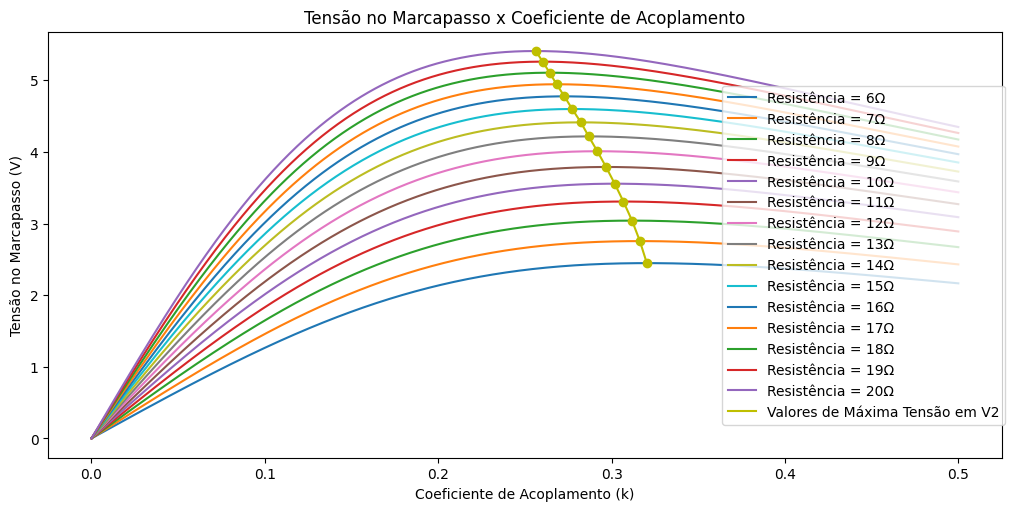

In [460]:
print(f"Tensão da Fonte: {fonte:.2f}V")

FatoresDeAcoplamento = np.linspace(0, 0.5, 1000, endpoint=True)
Cargas = range(6, 21)

vMarcaPasso = []
SFonte = []
SMarcaPasso = []
FatorDeEficiencia = []

fig, ax = plt.subplots(layout='constrained',figsize=(10,5))

rdc1 = resistenciaBobinaPrimaria + ((2 * resistenciaBobinaPrimaria) / (100 * 10**3) ) * F
rdc2 = resistenciaBobinaSecundaria + ((2 * resistenciaBobinaSecundaria) / (100 * 10**3) ) * F

XC2 = 1/(1j*w*c)

for carga in Cargas:
	vMarcaPasso.append([])
	SFonte.append([])
	SMarcaPasso.append([])
	FatorDeEficiencia.append([])
	
	for k in FatoresDeAcoplamento:
		i1,i2 = CalcularCorrentesNoTransformador(fonte, carga, rdc1, rdc2, c, c, indutanciaBobinaPrimaria, indutanciaBobinaSecundaria, w, k)
		
		r = (carga*XC2)/(carga+XC2)
		
		# Tensão no marcapasso
		vMarcaPasso[-1].append(abs(i2*r))

		# Potencias do circuito
		SFonte[-1].append((fonte*i1.conjugate()/2).real)
		SMarcaPasso[-1].append(((vMarcaPasso[-1][-1]**2/carga)/2).real)
		FatorDeEficiencia[-1].append((SMarcaPasso[-1][-1]/SFonte[-1][-1]))
	
	ax.plot(FatoresDeAcoplamento, vMarcaPasso[-1], label=f"Resistência = {carga}Ω")

valoresDePico = {}

for idx in range(len(vMarcaPasso)):
	maxValue = max(vMarcaPasso[idx])
	kDePico = FatoresDeAcoplamento[vMarcaPasso[idx].index(maxValue)]
	
	ax.plot(kDePico, maxValue, 'yo')
	valoresDePico[Cargas[idx]] = (kDePico, maxValue)
	
	print(f"O valor de pico para a carga {Cargas[idx]}Ω é {maxValue:.4f}V com k = {kDePico:.4f}")

listK, listV = zip(*valoresDePico.values())

ax.plot(listK, listV, 'y', label="Valores de Máxima Tensão em V2")

fig.legend(loc='center right')

plt.title("Tensão no Marcapasso x Coeficiente de Acoplamento")
plt.xlabel("Coeficiente de Acoplamento (k)")
plt.ylabel("Tensão no Marcapasso (V)")
plt.show()

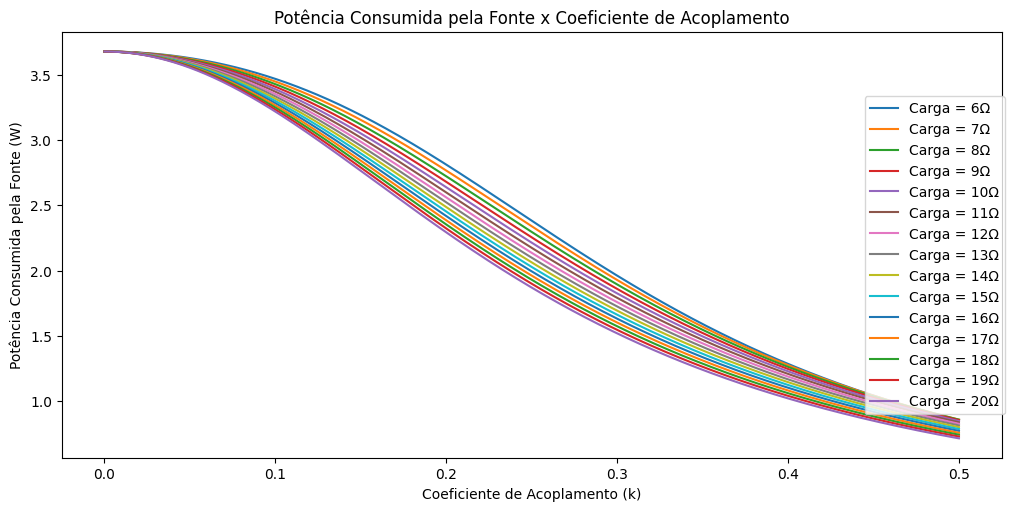

In [461]:
fig, ax = plt.subplots(layout='constrained',figsize=(10,5))

for i in range(len(Cargas)):
    ax.plot(FatoresDeAcoplamento, SFonte[i], label=f"Carga = {Cargas[i]}Ω")

fig.legend(loc='center right')

plt.title("Potência Consumida pela Fonte x Coeficiente de Acoplamento")
plt.xlabel("Coeficiente de Acoplamento (k)")
plt.ylabel("Potência Consumida pela Fonte (W)")
plt.show()

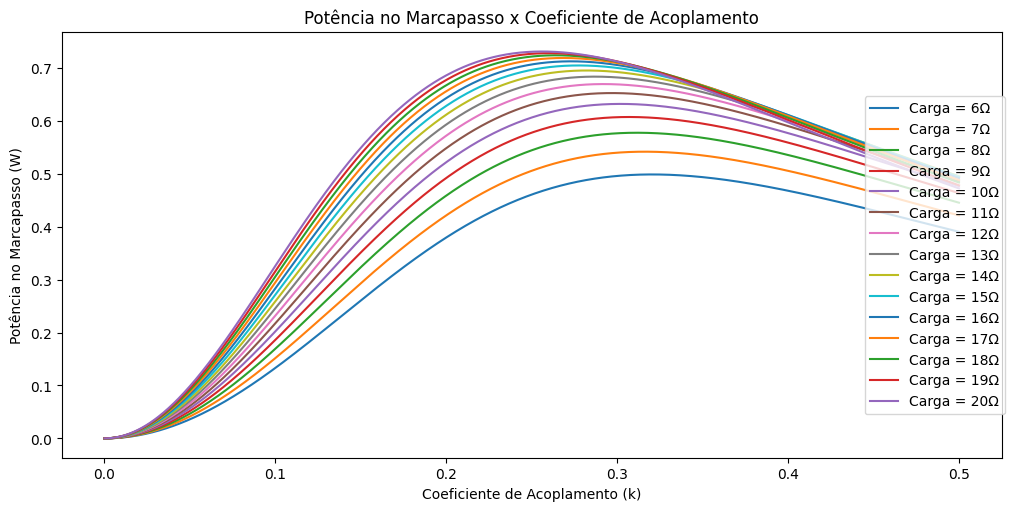

In [462]:
fig, ax = plt.subplots(layout='constrained',figsize=(10,5))

for i in range(len(Cargas)):
    ax.plot(FatoresDeAcoplamento, SMarcaPasso[i], label=f"Carga = {Cargas[i]}Ω")

fig.legend(loc='center right')

plt.title("Potência no Marcapasso x Coeficiente de Acoplamento")
plt.xlabel("Coeficiente de Acoplamento (k)")
plt.ylabel("Potência no Marcapasso (W)")
plt.show()

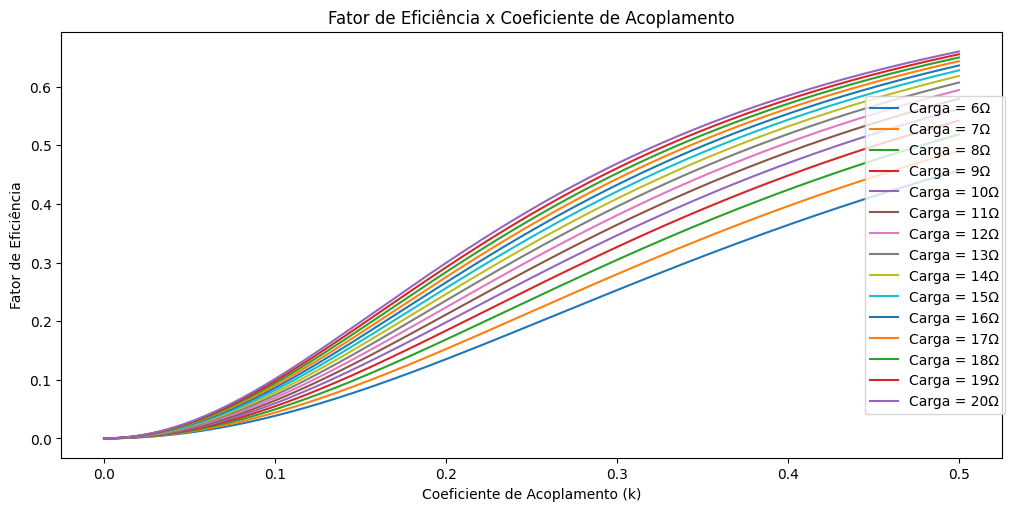

In [463]:
fig, ax = plt.subplots(layout='constrained',figsize=(10,5))

for i in range(len(Cargas)):
    ax.plot(FatoresDeAcoplamento, FatorDeEficiencia[i], label=f"Carga = {Cargas[i]}Ω")

fig.legend(loc='center right')

plt.title("Fator de Eficiência x Coeficiente de Acoplamento")
plt.xlabel("Coeficiente de Acoplamento (k)")
plt.ylabel("Fator de Eficiência")
plt.show()